In [1]:
import os
import pickle

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from metrics.visualization import visualization

%matplotlib inline

## PCA and t-SNE visualization

In [2]:
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
    # ori_data = ori_data.reshape(ori_data.shape[0]*ori_data.shape[1], ori_data.shape[2])
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)
    # new_data = new_data.reshape(new_data.shape[0]*new_data.shape[1], new_data.shape[2])

print(ori_data.shape, new_data.shape)

(130, 100, 1) (130, 100, 1)


In [3]:
print("Original data", ori_data)
print("New data", new_data)

Original data [[[ 0.64197531]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.58024691]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.62962963]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 ...

 [[ 0.50617284]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.14814815]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.65432099]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]]
New data [[[ 0.71423686]
  [-0.99888015]
  [-0.99888015]
  ...
  [-0.99888015]
  [-0.99888015]
  [-0.99888015]]

 [[ 0.1957463 ]
  [-0.99888015]
  [-0.99888015]
  ...
  [-0.99888015]
  [-0.99888015]
  [-0.99888015]]

 [[ 0.19847095]
  [-0.99888015]
  [-0.99888015]
  ...
  [-0.99888015]
  [-0.99888015]
  [-0.99888015]]

 ...

 [[ 0.20401224]
  [-0.9988801

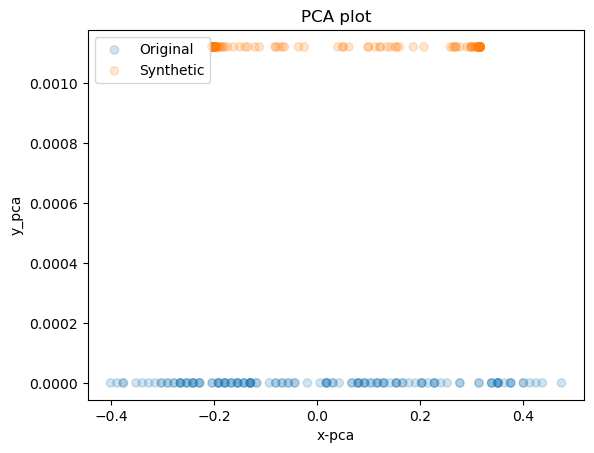

In [4]:
visualization(ori_data, new_data, 'pca')

c:\Users\afons\miniconda3\envs\gasten3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\afons\miniconda3\envs\gasten3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 260 samples in 0.000s...
[t-SNE] Computed neighbors for 260 samples in 0.194s...
[t-SNE] Computed conditional probabilities for sample 260 / 260
[t-SNE] Mean sigma: 0.010097
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.153061
[t-SNE] KL divergence after 300 iterations: 0.091615


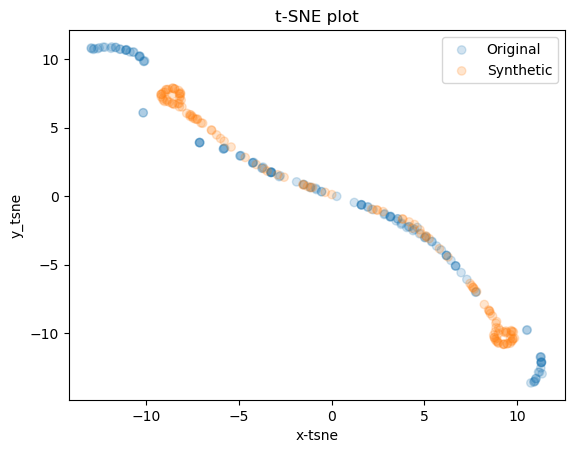

In [5]:
visualization(ori_data, new_data, 'tsne')

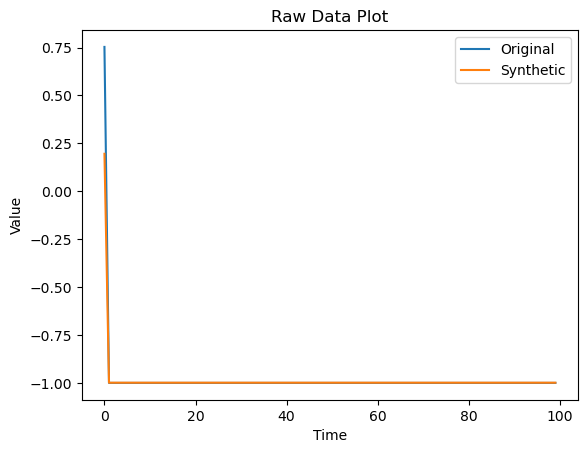

In [6]:
import random

# Select a random instance index
idx = random.randint(0, len(ori_data) - 1)
plt.plot(ori_data[idx,:,0], label='Original')  # Plotting the first feature of the selected instance
plt.plot(new_data[idx,:,0], label='Synthetic')  # Plotting the first feature of the selected instance from generated data

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Raw Data Plot')
plt.legend()
plt.show()

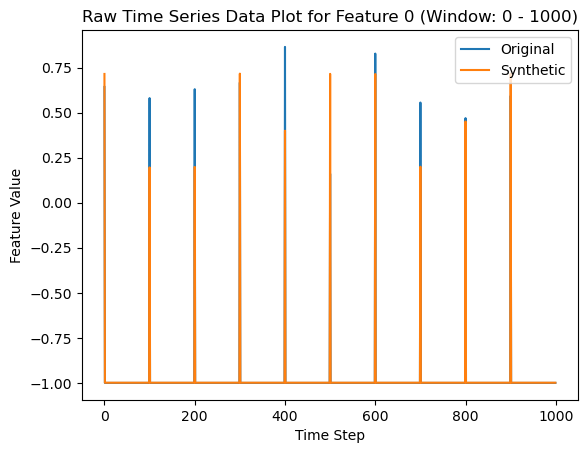

In [7]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Define the start and end indices of the window
window_start = 0
window_end = 1000  # Adjust this value to define the end of the window

# Flatten the arrays to plot the time series data for the selected feature within the window
ori_data_flattened = ori_data[:, window_start:window_end, feature_index].flatten()
new_data_flattened = new_data[:, window_start:window_end, feature_index].flatten()

# Generate corresponding time step indices for the window
time_steps = np.arange(window_start, window_end)

# Plot the time series data within the window with corresponding time steps
plt.plot(time_steps, ori_data_flattened[:window_end - window_start], label='Original')
plt.plot(time_steps, new_data_flattened[:window_end - window_start], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (Window: {} - {})'.format(feature_index, window_start, window_end))
plt.legend()
plt.show()


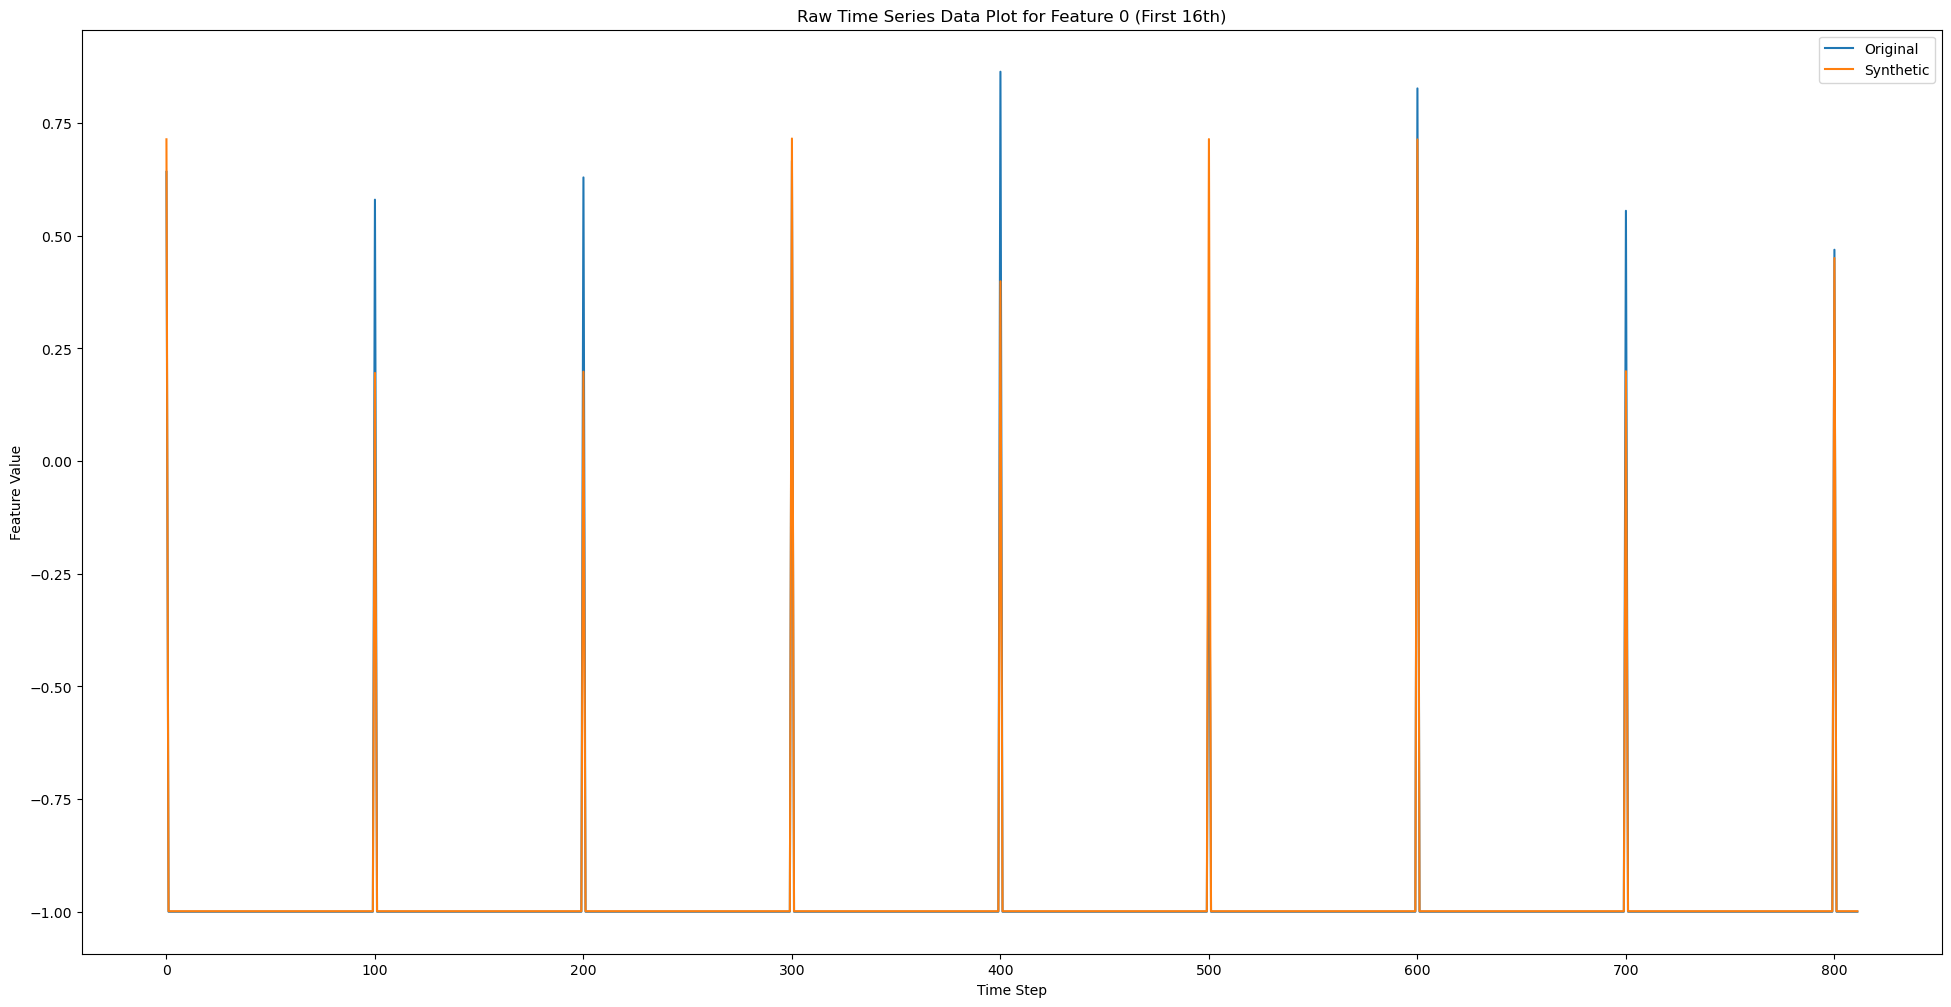

In [8]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Flatten the arrays to plot the full time series data for the selected feature
ori_data_flattened = ori_data[:,:,feature_index].flatten()
new_data_flattened = new_data[:,:,feature_index].flatten()

# Generate corresponding time step indices
time_steps = np.arange(len(ori_data_flattened))

# Set the figure size
plt.figure(figsize=(24, 12))  # Adjust width and height as needed

# Determine the length of the time series data
total_time_steps = len(ori_data_flattened)

# Calculate the range for the quarter of the data
quarter_range = total_time_steps // 16

# Plot only the first quarter of the data
plt.plot(time_steps[:quarter_range], ori_data_flattened[:quarter_range], label='Original')
plt.plot(time_steps[:quarter_range], new_data_flattened[:quarter_range], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (First 16th)'.format(feature_index))
plt.legend()
plt.show()